## Problem Statements

To remain competative in the dynamic market, businesses need to understand the factors influencing market capitalization and sales perfomance. this project aims to analyze the top 500 companies in india to uncover ket metrics and relationships the impact their market position.

## Objective


##### 1.Identify the key financial metrics that influence market capitalization among the top 500 companies.
##### 2.Analyze the correlation between quarterly sales and market capitalization.
##### 3.Determine the industry-specific factors that contribute to a company's competitive advantage.
##### 4.Compare and rank companies within the same industry based on market performance indicators.







## Importing the libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the file

In [35]:
df = pd.read_csv(r"D:\Project\2\Financial Analytics data.csv")
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [36]:
print(df.to_string())

     S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0        1    Reliance Inds.        583436.72           99810.00         NaN
1        2               TCS        563709.84           30904.00         NaN
2        3         HDFC Bank        482953.59           20581.27         NaN
3        4               ITC        320985.27            9772.02         NaN
4        5           H D F C        289497.37           16840.51         NaN
5        6    Hind. Unilever        288265.26            8590.00         NaN
6        7     Maruti Suzuki        263493.81           19283.20         NaN
7        8           Infosys        248320.35           17794.00         NaN
8        9           O N G C        239981.50           22995.88         NaN
9       10    St Bk of India        232763.33           57014.08         NaN
10      11        ICICI Bank        203802.35           13665.35         NaN
11      12   Kotak Mah. Bank        199253.77            6390.71         NaN

In [37]:
# Add the two columns, treating NaN as 0
df['Sales Qtr'] = df['Sales Qtr - Crore'].fillna(0) + df['Unnamed: 4'].fillna(0)

# Display the DataFrame
print(df.to_string())


     S.No.              Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4  Sales Qtr
0        1    Reliance Inds.        583436.72           99810.00         NaN   99810.00
1        2               TCS        563709.84           30904.00         NaN   30904.00
2        3         HDFC Bank        482953.59           20581.27         NaN   20581.27
3        4               ITC        320985.27            9772.02         NaN    9772.02
4        5           H D F C        289497.37           16840.51         NaN   16840.51
5        6    Hind. Unilever        288265.26            8590.00         NaN    8590.00
6        7     Maruti Suzuki        263493.81           19283.20         NaN   19283.20
7        8           Infosys        248320.35           17794.00         NaN   17794.00
8        9           O N G C        239981.50           22995.88         NaN   22995.88
9       10    St Bk of India        232763.33           57014.08         NaN   57014.08
10      11        ICICI Bank    

In [38]:
df = df.drop(columns=['Sales Qtr - Crore', 'Unnamed: 4'],errors='ignore')
print(df.to_string())

     S.No.              Name  Mar Cap - Crore  Sales Qtr
0        1    Reliance Inds.        583436.72   99810.00
1        2               TCS        563709.84   30904.00
2        3         HDFC Bank        482953.59   20581.27
3        4               ITC        320985.27    9772.02
4        5           H D F C        289497.37   16840.51
5        6    Hind. Unilever        288265.26    8590.00
6        7     Maruti Suzuki        263493.81   19283.20
7        8           Infosys        248320.35   17794.00
8        9           O N G C        239981.50   22995.88
9       10    St Bk of India        232763.33   57014.08
10      11        ICICI Bank        203802.35   13665.35
11      12   Kotak Mah. Bank        199253.77    6390.71
12      13        Coal India        192677.98   21643.28
13      14   Larsen & Toubro        180860.74   28747.45
14      15           I O C L        178017.48  110666.93
15      16     Bharti Airtel        167131.29   20318.60
16      17         Axis Bank   

In [39]:
df = df.dropna()
print(df.to_string())

     S.No.              Name  Mar Cap - Crore  Sales Qtr
0        1    Reliance Inds.        583436.72   99810.00
1        2               TCS        563709.84   30904.00
2        3         HDFC Bank        482953.59   20581.27
3        4               ITC        320985.27    9772.02
4        5           H D F C        289497.37   16840.51
5        6    Hind. Unilever        288265.26    8590.00
6        7     Maruti Suzuki        263493.81   19283.20
7        8           Infosys        248320.35   17794.00
8        9           O N G C        239981.50   22995.88
9       10    St Bk of India        232763.33   57014.08
10      11        ICICI Bank        203802.35   13665.35
11      12   Kotak Mah. Bank        199253.77    6390.71
12      13        Coal India        192677.98   21643.28
13      14   Larsen & Toubro        180860.74   28747.45
14      15           I O C L        178017.48  110666.93
15      16     Bharti Airtel        167131.29   20318.60
16      17         Axis Bank   

In [40]:
missing_values = df.isnull().sum()
print('missing values of all clomun')
print(missing_values)

missing values of all clomun
S.No.              0
Name               0
Mar Cap - Crore    0
Sales Qtr          0
dtype: int64


In [41]:
mean_sales_qtr = df['Sales Qtr'].mean()
print(mean_sales_qtr)

3648.800292275575


In [42]:
df.nunique()

S.No.              479
Name               479
Mar Cap - Crore    479
Sales Qtr          459
dtype: int64

In [43]:
df.replace(0, pd.NA, inplace=True)  

df["Sales Qtr"].fillna(df["Sales Qtr"].mean(), inplace=True)
df = df.round({"Sales Qtr": 2})
print(df.to_string())


     S.No.              Name  Mar Cap - Crore  Sales Qtr
0        1    Reliance Inds.        583436.72   99810.00
1        2               TCS        563709.84   30904.00
2        3         HDFC Bank        482953.59   20581.27
3        4               ITC        320985.27    9772.02
4        5           H D F C        289497.37   16840.51
5        6    Hind. Unilever        288265.26    8590.00
6        7     Maruti Suzuki        263493.81   19283.20
7        8           Infosys        248320.35   17794.00
8        9           O N G C        239981.50   22995.88
9       10    St Bk of India        232763.33   57014.08
10      11        ICICI Bank        203802.35   13665.35
11      12   Kotak Mah. Bank        199253.77    6390.71
12      13        Coal India        192677.98   21643.28
13      14   Larsen & Toubro        180860.74   28747.45
14      15           I O C L        178017.48  110666.93
15      16     Bharti Airtel        167131.29   20318.60
16      17         Axis Bank   

In [44]:
duplicates = df[df.duplicated(subset=['Sales Qtr'])].reset_index()
print(duplicates)

    index  S.No.              Name  Mar Cap - Crore  Sales Qtr
0     171    176  Info Edg.(India)         14845.05     3816.1
1     185    192     Max Financial         13401.76     3816.1
2     224    231     Bombay Burmah         10864.53     3816.1
3     241    248  Sundaram Clayton         10074.36     3816.1
4     258    271      Mahindra CIE          8587.04     3816.1
5     314    327      Prism Cement          6176.23     3816.1
6     332    345          GE Power          5497.40     3816.1
7     338    351              MMTC          5300.00     3816.1
8     370    383       Swan Energy          4721.49     3816.1
9     374    387      Shoppers St.          4558.06     3816.1
10    379    392   Stand.Chart.PLC          4487.31     3816.1
11    393    406  Ujjivan Fin.Ser.          4293.42     3816.1
12    396    409        Jindal Saw          4278.31     3816.1
13    398    411       Linde India          4198.33     3816.1
14    409    422     JP Associates          4074.37    

In [45]:
df.isnull().sum()

S.No.              0
Name               0
Mar Cap - Crore    0
Sales Qtr          0
dtype: int64

In [46]:
df.to_csv("Financial Analytics 1.csv")

In [70]:
# Reset the index
df.reset_index(drop=True, inplace=True)

     S.No.             Name  Mar Cap - Crore  Sales Qtr
0        1   Reliance Inds.        583436.72   99810.00
1        2              TCS        563709.84   30904.00
2        3        HDFC Bank        482953.59   20581.27
3        4              ITC        320985.27    9772.02
4        5          H D F C        289497.37   16840.51
..     ...              ...              ...        ...
474    495      Prime Focus          3031.50     609.61
475    496  Lak. Vilas Bank          3029.57     790.17
476    497            NOCIL          3026.26     249.27
477    498    Orient Cement          3024.32     511.53
478    499  Natl.Fertilizer          3017.07    2840.75

[479 rows x 4 columns]


In [73]:
df['S No'] = df.index + 1
print(df)

     S.No.             Name  Mar Cap - Crore  Sales Qtr  S No
0        1   Reliance Inds.        583436.72   99810.00     1
1        2              TCS        563709.84   30904.00     2
2        3        HDFC Bank        482953.59   20581.27     3
3        4              ITC        320985.27    9772.02     4
4        5          H D F C        289497.37   16840.51     5
..     ...              ...              ...        ...   ...
474    495      Prime Focus          3031.50     609.61   475
475    496  Lak. Vilas Bank          3029.57     790.17   476
476    497            NOCIL          3026.26     249.27   477
477    498    Orient Cement          3024.32     511.53   478
478    499  Natl.Fertilizer          3017.07    2840.75   479

[479 rows x 5 columns]


In [78]:
df.drop(columns=["S.No."],inplace =True)
df.head()

,Name,Mar Cap - Crore,Sales Qtr,S No
0,Reliance Inds.,583436.72,99810.00,1
1,TCS,563709.84,30904.00,2
2,HDFC Bank,482953.59,20581.27,3
3,ITC,320985.27,9772.02,4
4,H D F C,289497.37,16840.51,5


In [79]:
# Define the desired order of columns
desired_order = ['S No', 'Name', 'Mar Cap - Crore', 'Sales Qtr']
df = df[desired_order]
df.head()

,S No,Name,Mar Cap - Crore,Sales Qtr
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [47]:
Mean=df[["Mar Cap - Crore",'Sales Qtr']].mean()
Median = df[["Mar Cap - Crore",'Sales Qtr']].median()
print("Mean is:")
print(Mean)
print("------------------------------------------------------")
print("Mode is:")
print(Median)

Mean is:
Mar Cap - Crore    28043.857119
Sales Qtr           3816.103215
dtype: float64
------------------------------------------------------
Mode is:
Mar Cap - Crore    9885.05
Sales Qtr          1205.03
dtype: float64


In [48]:
SD = df[["Mar Cap - Crore",'Sales Qtr']].std()
print(f'Standard Deviation is:\n{SD}')


Standard Deviation is:
Mar Cap - Crore    59464.615831
Sales Qtr           9776.678118
dtype: float64


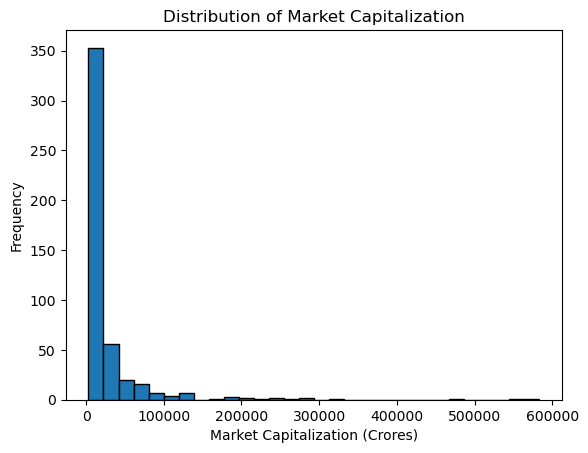

In [66]:
plt.hist(df['Mar Cap - Crore'], bins=30,edgecolor="black")
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crores)')
plt.ylabel('Frequency')
plt.show()


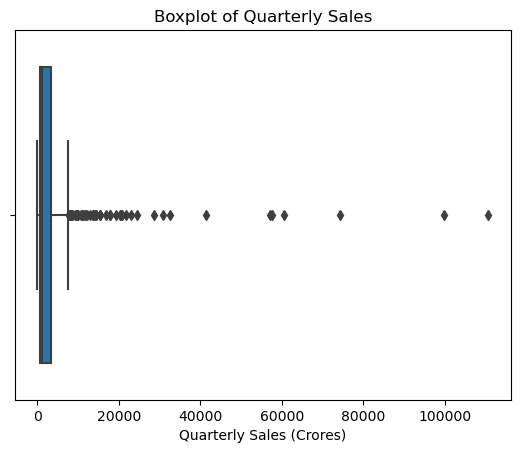

In [85]:
# Boxplot for Quarterly Sales
sns.boxplot(x=df['Sales Qtr'])
plt.title('Boxplot of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crores)')
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No             479 non-null    int64  
 1   Name             479 non-null    object 
 2   Mar Cap - Crore  479 non-null    float64
 3   Sales Qtr        479 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.1+ KB


In [99]:
 df[["Mar Cap - Crore","Sales Qtr"]].corr()

,Mar Cap - Crore,Sales Qtr
Mar Cap - Crore,1.000000,0.622197
Sales Qtr,0.622197,1.000000


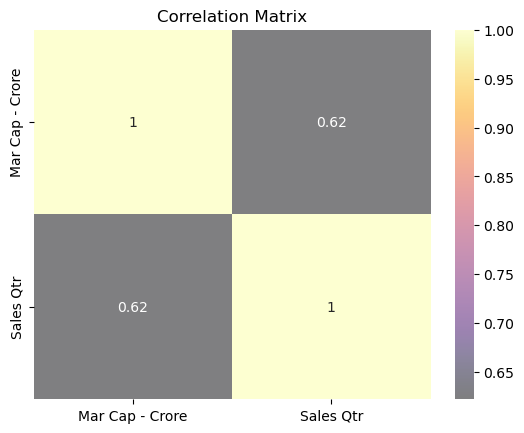

In [106]:
sns.heatmap(correlation, annot=True, cmap='inferno',alpha=0.5)
plt.title('Correlation Matrix')
plt.show()

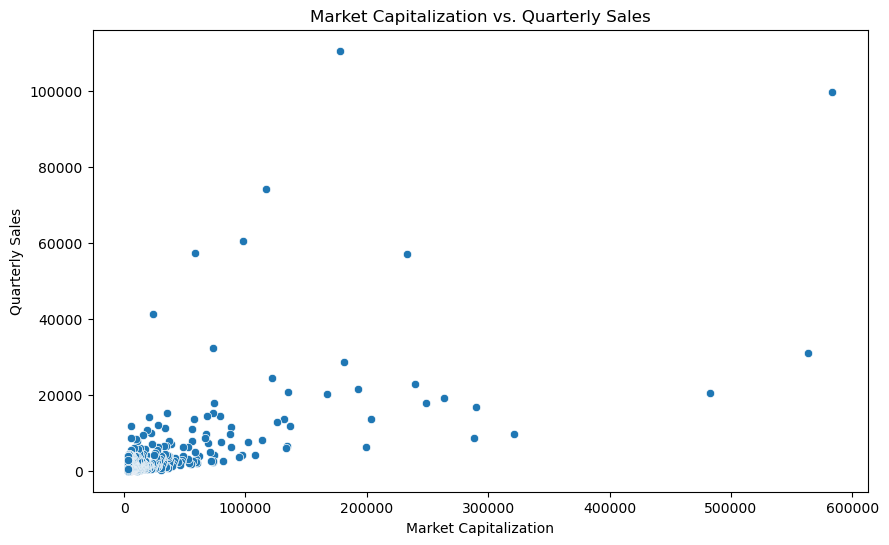

In [107]:
# Scatter plot between Market Capitalization and Quarterly Sales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr', data=df)
plt.title('Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Capitalization')
plt.ylabel('Quarterly Sales')
plt.show()

In [113]:
plt.plot(kind='bar', figsize=(14, 7))
plt.title('Average Market Capitalization and Quarterly Sales by Industry')
plt.ylabel('Value in Crores')
plt.show()

                 Name  Mar Cap - Crore  Sales Qtr
0            3M India         23101.19     645.77
1               A B B         31983.33    2779.40
2                 ACC         30803.68    3494.24
3           AIA Engg.         13593.35     572.16
4          APL Apollo          4775.03    1314.38
..                ...              ...        ...
474          Yes Bank         71028.13    5070.30
475  Zee Entertainmen         54817.89    1838.07
476      Zensar Tech.          4066.42     793.76
477    Zydus Wellness          4921.45     132.40
478   eClerx Services          5259.14     339.89

[479 rows x 3 columns]


In [126]:
# Market Share Analysis
total_market_cap = df['Mar Cap - Crore'].sum()
df['Market Share (%)'] = (df['Mar Cap - Crore'] / total_market_cap) * 100

# Top 10 companies by market share
top_companies = df.sort_values(by='Market Share (%)', ascending=False).head(10)
top_companies = top_companies.round(2)
print(top_companies)


   S No            Name  Mar Cap - Crore  Sales Qtr  Market Share (%)
0     1  Reliance Inds.        583436.72   99810.00              4.34
1     2             TCS        563709.84   30904.00              4.20
2     3       HDFC Bank        482953.59   20581.27              3.60
3     4             ITC        320985.27    9772.02              2.39
4     5         H D F C        289497.37   16840.51              2.16
5     6  Hind. Unilever        288265.26    8590.00              2.15
6     7   Maruti Suzuki        263493.81   19283.20              1.96
7     8         Infosys        248320.35   17794.00              1.85
8     9         O N G C        239981.50   22995.88              1.79
9    10  St Bk of India        232763.33   57014.08              1.73


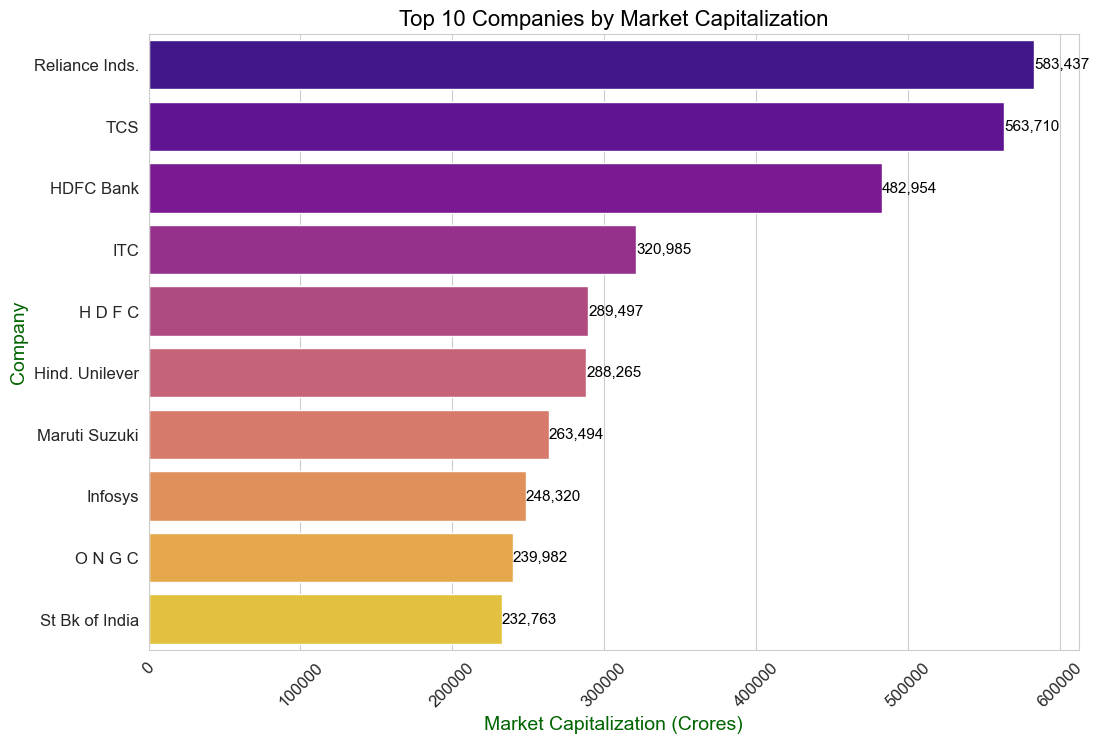

In [145]:


# Sort the DataFrame by 'Mar Cap - Crore' and get the top 10
top_market_cap = df.sort_values(by='Mar Cap - Crore', ascending=False).head(10)


# Create a color palette
colors = sns.color_palette("plasma", len(top_market_cap))

# Bar chart for top market cap companies with color palette
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Mar Cap - Crore', y='Name', data=top_market_cap, palette=colors)

# Add title and labels with customized fonts
plt.title('Top 10 Companies by Market Capitalization', fontsize=16, color='black')
plt.xlabel('Market Capitalization (Crores)', fontsize=14, color='darkgreen')
plt.ylabel('Company', fontsize=14, color='darkgreen')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations on the bars
for index, value in enumerate(top_market_cap['Mar Cap - Crore']):
    ax.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center", fontsize=11)

# Show plot
plt.show()


In [147]:
# Exporting to Excel
df.to_excel('Market_Cap_Analysis.xlsx', index=False)


